In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np, tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os
import csv
import gc
from sklearn.metrics import mean_squared_error
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



PRICED_BITCOIN_FILE_PATH = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/pricedBitcoin2009-2018.csv"
DAILY_OCCURRENCE_FILE_PATH = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/dailyOccmatrices/"


ROW = -1
COLUMN = -1
TEST_SPLIT = 0.01



ALL_YEAR_INPUT_ALLOWED = False
YEAR = 2017



IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  1
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 6)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 6)
train_target: (100,)
rmse_array: [7.119026980618628, 3.8831696752636162, 73.62452429394898, 87.43821701810703, 84.57453069938856, 157.06225866094815, 318.60841854362, 456.5736688874788, 431.08799412786016]


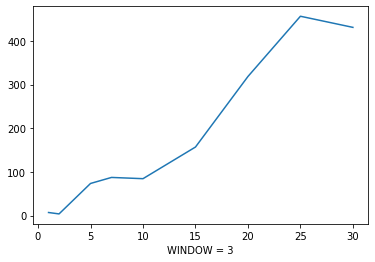

WINDOW_SIZE:  5
PREDICTION_HORIZON:  1
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 10)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 10)
train_target: (100,)
rmse_array: [3.53112934829187, 4.143659561293134, 60.73407068885035, 47.879425228903074, 71.07919476491134, 156.1006941639173, 206.14792095133157, 342.3700050216712, 113.12423972086435]


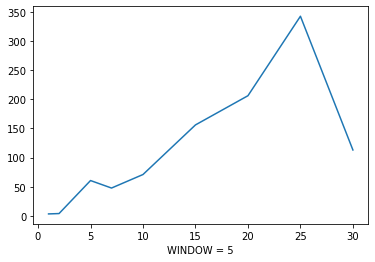

WINDOW_SIZE:  7
PREDICTION_HORIZON:  1
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 14)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 14)
train_target: (100,)
rmse_array: [38.535718049324714, 65.09698273335835, 45.6730621130107, 31.261431085806862, 93.09825316281831, 237.47204427559336, 231.5629240231176, 253.85028914970644, 250.97244314760655]


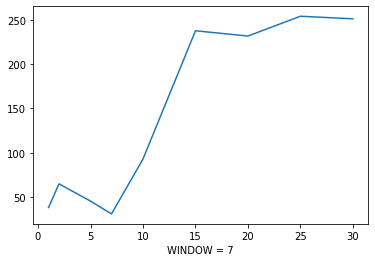

In [10]:
# baseline
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

def exclude_days(train, test):

    row, column = train.shape
    train_days = np.asarray(train[:, -1]).reshape(-1, 1)
    x_train = train[:, 0:column - 1]
    test_days = np.asarray(test[:, -1]).reshape(-1, 1)
    x_test = test[:, 0:column - 1]

    return x_train, x_test, train_days, test_days

def merge_data(occurrence_data, daily_occurrence_normalized_matrix, aggregation_of_previous_days_allowed):
    if(aggregation_of_previous_days_allowed):
        if(occurrence_data.size==0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.add(occurrence_data, daily_occurrence_normalized_matrix)
    else:
        if(occurrence_data.size == 0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.concatenate((occurrence_data, daily_occurrence_normalized_matrix), axis=1)
   #print("merge_data shape: {} occurrence_data: {} ".format(occurrence_data.shape, occurrence_data))
    return occurrence_data
    
    
def get_normalized_matrix_from_file(day, year, totaltx):
    daily_occurrence_matrix_path_name = DAILY_OCCURRENCE_FILE_PATH + "occ" + str(year) + '{:03}'.format(day) + '.csv'
    daily_occurence_matrix = pd.read_csv(daily_occurrence_matrix_path_name, sep=",", header=None).values
   #print("daily_occurence_matrix.size: ", daily_occurence_matrix.size, daily_occurence_matrix.shape)
   #print("np.asarray(daily_occurence_matrix): ",np.asarray(daily_occurence_matrix))
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size): ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size), np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).shape, np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).size)
   #print("totaltx: ",totaltx)
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx: ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx)
    return np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx

def get_daily_occurrence_matrices(priced_bitcoin, current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
   #print("priced_bitcoin: ", priced_bitcoin, priced_bitcoin.shape)
   #print("current_row: ", current_row, current_row.shape)
    previous_price_data = np.array([], dtype=np.float32)
    occurrence_data = np.array([], dtype=np.float32)
    for index, row in priced_bitcoin.iterrows():
        if not ((row.values == current_row.values).all()):
            previous_price_data = np.append(previous_price_data, row['price'])
            previous_price_data = np.append(previous_price_data, row['totaltx'])
           #print("previous_price_data: ", previous_price_data,row['day'], row['year'], row['totaltx'])

    
   #print("occurrence_data: ", occurrence_data)
    if(is_price_of_previous_days_allowed):
       #print("previous_price_data: ", np.asarray(previous_price_data).reshape(1, -1), np.asarray(previous_price_data).reshape(1, -1).shape)
        occurrence_data = np.asarray(previous_price_data).reshape(1, -1)

    occurrence_input = np.concatenate((occurrence_data, np.asarray(current_row['price']).reshape(1,1)), axis=1)
   #print("current_row['day']: ", current_row['day'], current_row['day'].shape)
   #print(" price occurrence_input: ", np.asarray(current_row['price']).reshape(1,1), (np.asarray(current_row['price']).reshape(1,1)).shape)
   #print("concatenate with price occurrence_input: ", occurrence_input, occurrence_input.shape)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['day']).reshape(1,1)), axis=1)
   #print(" price occurrence_input: ", np.asarray(current_row['day']).reshape(1,1), (np.asarray(current_row['day']).reshape(1,1)).shape)

    #print("concatenate with day occurrence_input: ", occurrence_input, occurrence_input.shape)

    return occurrence_input



def run_print_model(train_input, train_target, test_input, test_target, train_days, test_days):
    elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5) 
    print("train_input:",train_input.shape)
    print("train_target:",train_target.ravel().shape)
    elastic.fit(train_input,train_target.ravel())  
    predicted = elastic.predict(test_input) 
    rmse = np.sqrt(metrics.mean_squared_error(test_target, predicted))
    #print ("RMSE:", np.sqrt(metrics.mean_squared_error(test_target, predicted))) 
    return rmse

def preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    if(ALL_YEAR_INPUT_ALLOWED):
        pass
    else:
        priced_bitcoin = priced_bitcoin[priced_bitcoin['year']==YEAR].reset_index(drop=True)
    
    # get normalized occurence matrix in a flat format and merge with totaltx
    daily_occurrence_input = np.array([],dtype=np.float32)
    temp = np.array([], dtype=np.float32)
    for current_index, current_row in priced_bitcoin.iterrows():
        if(current_index<(window_size+prediction_horizon-1)):
            pass
        else:
            start_index = current_index - (window_size + prediction_horizon) + 1
            end_index = current_index - prediction_horizon
            temp = get_daily_occurrence_matrices(priced_bitcoin[start_index:end_index+1], current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)    
            #print("1st temp: ", temp, temp.shape)
        if(daily_occurrence_input.size == 0):
            daily_occurrence_input = temp
        else:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
            #print("temp: ", temp, temp.shape)
            daily_occurrence_input = np.concatenate((daily_occurrence_input, temp), axis=0)
            #print("return daily_occurrence_input:", daily_occurrence_input, daily_occurrence_input.shape)
            
        #if current_index == 108:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
    return daily_occurrence_input
        
betti0_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_0(100).csv"
betti1_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_1(100).csv"

def read_betti(file_path, day):
    day = day - 1
    betti = pd.read_csv(file_path, index_col=0)
    try:
        betti_50 = betti.iloc[day, 0:50]
    except:
        print("day:",  day)
            
    return betti_50
    
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    data = preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
    #train, test = train_test_split(data, test_size=TEST_SPLIT)
    #data = pd.DataFrame(data)
    train = data[0:100, :]
    test = data[101, :].reshape(1, -1)
    #print(" train, test shape",train.shape, test.shape)
    #print(" train, test",train, test)
    
    x_train, x_test, train_days, test_days = exclude_days(train, test)
    #print("x_train:", x_train)
    row, column = x_train.shape
    train_target = np.asarray(x_train[:, -1]).reshape(-1)
    train_input = x_train[:, 0:column - 1]
    #x_test = x_test.reshape(-1,1)
    test_target = x_test[: , -1]
    test_input = x_test[ : , 0:column - 1]
    return train_input, train_target, test_input, test_target, train_days, test_days

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = [1, 2, 5, 7, 10, 15, 20, 25, 30]
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in horizon_size_array:
            print("PREDICTION_HORIZON: ", prediction_horizon)
            train_input, train_target, test_input, test_target, train_days, test_days = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
            
        print("rmse_array:", rmse_array)    
        plt.plot(horizon_size_array, rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()
        
        

In [ ]:
[[7.119026980618628, 3.8831696752636162, 73.62452429394898, 87.43821701810703, 84.57453069938856, 157.06225866094815, 318.60841854362, 456.5736688874788, 431.08799412786016],
[3.53112934829187, 4.143659561293134, 60.73407068885035, 47.879425228903074, 71.07919476491134, 156.1006941639173, 206.14792095133157, 342.3700050216712, 113.12423972086435],
[38.535718049324714, 65.09698273335835, 45.6730621130107, 31.261431085806862, 93.09825316281831, 237.47204427559336, 231.5629240231176, 253.85028914970644, 250.97244314760655]]

IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  1
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 106)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 106)
train_target: (100,)
rmse_array: [94.44651468296365, 77.45593937150716, 31.45903833039847, 51.68012298865824, 252.23279977022526, 154.97450226665114, 181.80426820582852, 442.9474106361338, 443.591676529144]


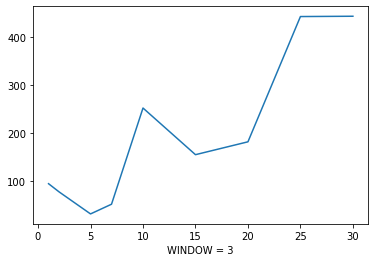

WINDOW_SIZE:  5
PREDICTION_HORIZON:  1
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 110)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 110)
train_target: (100,)
rmse_array: [32.29900912109156, 100.78448215403478, 54.95353985485008, 21.675458477407346, 127.44553061819056, 27.850637870891205, 242.41469094509284, 423.7420880384457, 259.91658297291565]


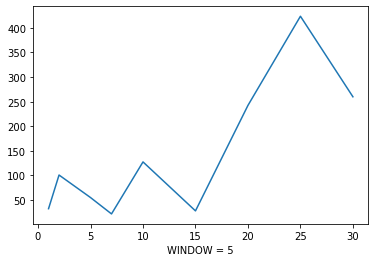

WINDOW_SIZE:  7
PREDICTION_HORIZON:  1
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 114)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 114)
train_target: (100,)
rmse_array: [81.85638414098867, 28.31527993795271, 36.35666117356345, 101.61893893864726, 316.33408300659835, 412.0398448929236, 33.519179916793746, 392.02152487711146, 24.491716975045847]


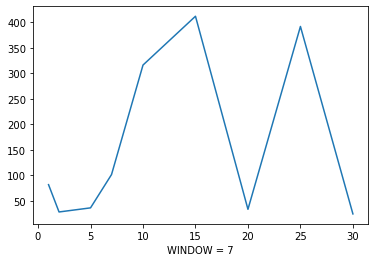

In [22]:
# Betti
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

def exclude_days(train, test):

    row, column = train.shape
    train_days = np.asarray(train[:, -1]).reshape(-1, 1)
    x_train = train[:, 0:column - 1]
    test_days = np.asarray(test[:, -1]).reshape(-1, 1)
    x_test = test[:, 0:column - 1]

    return x_train, x_test, train_days, test_days

def merge_data(occurrence_data, daily_occurrence_normalized_matrix, aggregation_of_previous_days_allowed):
    if(aggregation_of_previous_days_allowed):
        if(occurrence_data.size==0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.add(occurrence_data, daily_occurrence_normalized_matrix)
    else:
        if(occurrence_data.size == 0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.concatenate((occurrence_data, daily_occurrence_normalized_matrix), axis=1)
   #print("merge_data shape: {} occurrence_data: {} ".format(occurrence_data.shape, occurrence_data))
    return occurrence_data
    
    
def get_normalized_matrix_from_file(day, year, totaltx):
    daily_occurrence_matrix_path_name = DAILY_OCCURRENCE_FILE_PATH + "occ" + str(year) + '{:03}'.format(day) + '.csv'
    daily_occurence_matrix = pd.read_csv(daily_occurrence_matrix_path_name, sep=",", header=None).values
   #print("daily_occurence_matrix.size: ", daily_occurence_matrix.size, daily_occurence_matrix.shape)
   #print("np.asarray(daily_occurence_matrix): ",np.asarray(daily_occurence_matrix))
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size): ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size), np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).shape, np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).size)
   #print("totaltx: ",totaltx)
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx: ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx)
    return np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx

def get_daily_occurrence_matrices(priced_bitcoin, current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
   #print("priced_bitcoin: ", priced_bitcoin, priced_bitcoin.shape)
   #print("current_row: ", current_row, current_row.shape)
    previous_price_data = np.array([], dtype=np.float32)
    occurrence_data = np.array([], dtype=np.float32)
    for index, row in priced_bitcoin.iterrows():
        if not ((row.values == current_row.values).all()):
            previous_price_data = np.append(previous_price_data, row['price'])
            previous_price_data = np.append(previous_price_data, row['totaltx'])
           #print("previous_price_data: ", previous_price_data,row['day'], row['year'], row['totaltx'])

    
   #print("occurrence_data: ", occurrence_data)
    if(is_price_of_previous_days_allowed):
       #print("previous_price_data: ", np.asarray(previous_price_data).reshape(1, -1), np.asarray(previous_price_data).reshape(1, -1).shape)
        occurrence_data = np.asarray(previous_price_data).reshape(1, -1)
    betti0_50 = read_betti(betti0_input_path, current_row['day'])
    occurrence_input = np.concatenate((occurrence_data, np.asarray(betti0_50).reshape(1,-1)), axis=1)

    betti1_50 = read_betti(betti1_input_path, current_row['day'])
    occurrence_input = np.concatenate((occurrence_input, np.asarray(betti1_50).reshape(1,-1)), axis=1)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['price']).reshape(1,1)), axis=1)
   #print("current_row['day']: ", current_row['day'], current_row['day'].shape)
   #print(" price occurrence_input: ", np.asarray(current_row['price']).reshape(1,1), (np.asarray(current_row['price']).reshape(1,1)).shape)
   #print("concatenate with price occurrence_input: ", occurrence_input, occurrence_input.shape)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['day']).reshape(1,1)), axis=1)
   #print(" price occurrence_input: ", np.asarray(current_row['day']).reshape(1,1), (np.asarray(current_row['day']).reshape(1,1)).shape)

    #print("concatenate with day occurrence_input: ", occurrence_input, occurrence_input.shape)

    return occurrence_input



def run_print_model(train_input, train_target, test_input, test_target, train_days, test_days):
    elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5, max_iter=1000000)
    print("train_input:",train_input.shape)
    print("train_target:",train_target.ravel().shape)
    elastic.fit(train_input,train_target.ravel())  
    predicted = elastic.predict(test_input) 
    rmse = np.sqrt(metrics.mean_squared_error(test_target, predicted))
    #print ("RMSE:", np.sqrt(metrics.mean_squared_error(test_target, predicted))) 
    return rmse

def preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    if(ALL_YEAR_INPUT_ALLOWED):
        pass
    else:
        priced_bitcoin = priced_bitcoin[priced_bitcoin['year']==YEAR].reset_index(drop=True)
    
    # get normalized occurence matrix in a flat format and merge with totaltx
    daily_occurrence_input = np.array([],dtype=np.float32)
    temp = np.array([], dtype=np.float32)
    for current_index, current_row in priced_bitcoin.iterrows():
        if(current_index<(window_size+prediction_horizon-1)):
            pass
        else:
            start_index = current_index - (window_size + prediction_horizon) + 1
            end_index = current_index - prediction_horizon
            temp = get_daily_occurrence_matrices(priced_bitcoin[start_index:end_index+1], current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)    
            #print("1st temp: ", temp, temp.shape)
        if(daily_occurrence_input.size == 0):
            daily_occurrence_input = temp
        else:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
            #print("temp: ", temp, temp.shape)
            daily_occurrence_input = np.concatenate((daily_occurrence_input, temp), axis=0)
            #print("return daily_occurrence_input:", daily_occurrence_input, daily_occurrence_input.shape)
            
        #if current_index == 108:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
    return daily_occurrence_input
        
betti0_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_0(100).csv"
betti1_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_1(100).csv"

def read_betti(file_path, day):
    day = day - 1
    betti = pd.read_csv(file_path, index_col=0)
    try:
        betti_50 = betti.iloc[day, 0:50]
    except:
        print("day:",  day)
            
    return betti_50
    
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    data = preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
    #train, test = train_test_split(data, test_size=TEST_SPLIT)
    #data = pd.DataFrame(data)
    train = data[0:100, :]
    test = data[101, :].reshape(1, -1)
    #print(" train, test shape",train.shape, test.shape)
    #print(" train, test",train, test)
    
    x_train, x_test, train_days, test_days = exclude_days(train, test)
    #print("x_train:", x_train)
    row, column = x_train.shape
    train_target = np.asarray(x_train[:, -1]).reshape(-1)
    train_input = x_train[:, 0:column - 1]
    #x_test = x_test.reshape(-1,1)
    test_target = x_test[: , -1]
    test_input = x_test[ : , 0:column - 1]
    return train_input, train_target, test_input, test_target, train_days, test_days

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = [1, 2, 5, 7, 10, 15, 20, 25, 30]
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in horizon_size_array:
            print("PREDICTION_HORIZON: ", prediction_horizon)
            train_input, train_target, test_input, test_target, train_days, test_days = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
            
        print("rmse_array:", rmse_array)    
        plt.plot(horizon_size_array, rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()
        
        

IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  1
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 1206)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 1206)
train_target: (100,)
rmse_array: [7.126080533432059, 3.8735249434535035, 73.58860184256355, 87.37314038912973, 84.37163980969922, 156.8768194734289, 318.4159071336385, 456.32703992746565, 430.79007369555916]


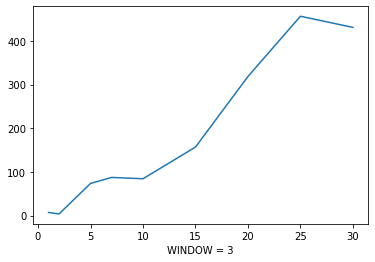

WINDOW_SIZE:  5
PREDICTION_HORIZON:  1
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 2010)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 2010)
train_target: (100,)
rmse_array: [3.5289547495508486, 4.156996114588537, 60.870629740247296, 48.05989733053116, 71.50605697981882, 156.53330257302605, 206.5766117704079, 342.56121916503025, 113.17925435565235]


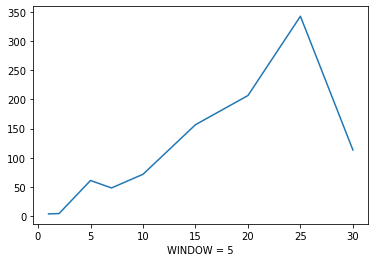

WINDOW_SIZE:  7
PREDICTION_HORIZON:  1
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  2
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  5
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  7
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  10
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  15
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  20
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  25
train_input: (100, 2814)
train_target: (100,)
PREDICTION_HORIZON:  30
train_input: (100, 2814)
train_target: (100,)
rmse_array: [38.539838304124714, 65.11731242645988, 45.80866639379724, 31.53523432024167, 93.73677313829512, 237.9400273451697, 231.78470303518702, 253.93053940109303, 251.01858285795606]


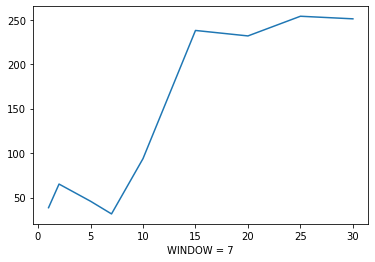

In [4]:
# Fl 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

def exclude_days(train, test):

    row, column = train.shape
    train_days = np.asarray(train[:, -1]).reshape(-1, 1)
    x_train = train[:, 0:column - 1]
    test_days = np.asarray(test[:, -1]).reshape(-1, 1)
    x_test = test[:, 0:column - 1]

    return x_train, x_test, train_days, test_days

def merge_data(occurrence_data, daily_occurrence_normalized_matrix, aggregation_of_previous_days_allowed):
    if(aggregation_of_previous_days_allowed):
        if(occurrence_data.size==0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.add(occurrence_data, daily_occurrence_normalized_matrix)
    else:
        if(occurrence_data.size == 0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.concatenate((occurrence_data, daily_occurrence_normalized_matrix), axis=1)
   #print("merge_data shape: {} occurrence_data: {} ".format(occurrence_data.shape, occurrence_data))
    return occurrence_data
    
    
def get_normalized_matrix_from_file(day, year, totaltx):
    daily_occurrence_matrix_path_name = DAILY_OCCURRENCE_FILE_PATH + "occ" + str(year) + '{:03}'.format(day) + '.csv'
    daily_occurence_matrix = pd.read_csv(daily_occurrence_matrix_path_name, sep=",", header=None).values
   #print("daily_occurence_matrix.size: ", daily_occurence_matrix.size, daily_occurence_matrix.shape)
   #print("np.asarray(daily_occurence_matrix): ",np.asarray(daily_occurence_matrix))
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size): ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size), np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).shape, np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).size)
   #print("totaltx: ",totaltx)
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx: ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx)
    return np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx

def get_daily_occurrence_matrices(priced_bitcoin, current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
   #print("priced_bitcoin: ", priced_bitcoin, priced_bitcoin.shape)
   #print("current_row: ", current_row, current_row.shape)
    previous_price_data = np.array([], dtype=np.float32)
    occurrence_data = np.array([], dtype=np.float32)
    for index, row in priced_bitcoin.iterrows():
        if not ((row.values == current_row.values).all()):
            previous_price_data = np.append(previous_price_data, row['price'])
            previous_price_data = np.append(previous_price_data, row['totaltx'])
            daily_occurrence_normalized_matrix = get_normalized_matrix_from_file(row['day'], row['year'], row['totaltx'])
            occurrence_data = merge_data(occurrence_data, daily_occurrence_normalized_matrix, aggregation_of_previous_days_allowed)
            #print("daily_occurrence_normalized_matrix: ", daily_occurrence_normalized_matrix,daily_occurrence_normalized_matrix.shape)

    
   #print("occurrence_data: ", occurrence_data)
    if(is_price_of_previous_days_allowed):
       #print("previous_price_data: ", np.asarray(previous_price_data).reshape(1, -1), np.asarray(previous_price_data).reshape(1, -1).shape)
        occurrence_data = np.concatenate((np.asarray(previous_price_data).reshape(1,-1), occurrence_data), axis=1)

    occurrence_input = np.concatenate((occurrence_data, np.asarray(current_row['price']).reshape(1,1)), axis=1)
   #print("current_row['day']: ", current_row['day'], current_row['day'].shape)
   #print(" price occurrence_input: ", np.asarray(current_row['price']).reshape(1,1), (np.asarray(current_row['price']).reshape(1,1)).shape)
   #print("concatenate with price occurrence_input: ", occurrence_input, occurrence_input.shape)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['day']).reshape(1,1)), axis=1)
   #print(" price occurrence_input: ", np.asarray(current_row['day']).reshape(1,1), (np.asarray(current_row['day']).reshape(1,1)).shape)

    #print("concatenate with day occurrence_input: ", occurrence_input, occurrence_input.shape)
    return occurrence_input


def print_results(predicted, test_target, original_log_return, predicted_log_return, cost, test_days, rmse):
    myFile = open('C:/Users/wang.yuhao/Documents/ChainNet/data/processed_data/rmse/' + str(YEAR) + ".csv", 'a')
    if(window_size == 1):
        myFile.write('IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:' + str(is_price_of_previous_days_allowed) + '\n')
        myFile.write('AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:' + str(aggregation_of_previous_days_allowed) + '\n')

        myFile.write('PREDICTION_HORIZON:' + str(prediction_horizon) + '\n')
    myFile.write('WINDOW_SIZE:' + str(window_size) + '\n')

    for p, t, o_l, p_l, t_d in zip(predicted, test_target, original_log_return, predicted_log_return, test_days):
        myFile.write(str(p) + "\t" + str(t) + "\t" + str(o_l) + "\t" + str(p_l) + "\t" + str(t_d) + '\n')
    myFile.write('TEST_COST:' + str(cost) + '\n')
    myFile.write('RMSE:' + str(rmse) + '\n')
    myFile.close()


def run_print_model(train_input, train_target, test_input, test_target, train_days, test_days):
    elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5) 
    print("train_input:",train_input.shape)
    print("train_target:",train_target.ravel().shape)
    elastic.fit(train_input,train_target.ravel())  
    predicted = elastic.predict(test_input) 
    rmse = np.sqrt(metrics.mean_squared_error(test_target, predicted))
    #print ("RMSE:", np.sqrt(metrics.mean_squared_error(test_target, predicted))) 
    return rmse
def preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    if(ALL_YEAR_INPUT_ALLOWED):
        pass
    else:
        priced_bitcoin = priced_bitcoin[priced_bitcoin['year']==YEAR].reset_index(drop=True)
    
    # get normalized occurence matrix in a flat format and merge with totaltx
    daily_occurrence_input = np.array([],dtype=np.float32)
    temp = np.array([], dtype=np.float32)
    for current_index, current_row in priced_bitcoin.iterrows():
        if(current_index<(window_size+prediction_horizon-1)):
            pass
        else:
            start_index = current_index - (window_size + prediction_horizon) + 1
            end_index = current_index - prediction_horizon
            temp = get_daily_occurrence_matrices(priced_bitcoin[start_index:end_index+1], current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)    
            #print("1st temp: ", temp, temp.shape)
        if(daily_occurrence_input.size == 0):
            daily_occurrence_input = temp
        else:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
            #print("temp: ", temp, temp.shape)
            daily_occurrence_input = np.concatenate((daily_occurrence_input, temp), axis=0)
            #print("return daily_occurrence_input:", daily_occurrence_input, daily_occurrence_input.shape)
            
        #if current_index == 108:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
    return daily_occurrence_input
        
betti0_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_0(100).csv"
betti1_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_1(100).csv"

def read_betti(file_path, day):
    day = day - 1
    betti = pd.read_csv(file_path, index_col=0)
    try:
        betti_50 = betti.iloc[day, 0:50]
    except:
        print("day:",  day)
            
    return betti_50
    
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    data = preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
    #train, test = train_test_split(data, test_size=TEST_SPLIT)
    #data = pd.DataFrame(data)
    train = data[0:100, :]
    test = data[101, :].reshape(1, -1)
    #print(" train, test shape",train.shape, test.shape)
    #print(" train, test",train, test)
    
    x_train, x_test, train_days, test_days = exclude_days(train, test)
    #print("x_train:", x_train)
    row, column = x_train.shape
    train_target = np.asarray(x_train[:, -1]).reshape(-1)
    train_input = x_train[:, 0:column - 1]
    #x_test = x_test.reshape(-1,1)
    test_target = x_test[: , -1]
    test_input = x_test[ : , 0:column - 1]
    return train_input, train_target, test_input, test_target, train_days, test_days

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = [1, 2, 5, 7, 10, 15, 20, 25, 30]
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in horizon_size_array:
            print("PREDICTION_HORIZON: ", prediction_horizon)
            train_input, train_target, test_input, test_target, train_days, test_days = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
        
        print("rmse_array:", rmse_array)
        plt.plot(horizon_size_array, rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()
        
        

IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED:  True
AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED:  False
WINDOW_SIZE:  3
PREDICTION_HORIZON:  1


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29129.281825159105, tolerance: 168.46052661360002
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.05603888, 0.05263228, 0.05250212, 0.05585113, 0.05215307,
       0.05333611, 0.0538718 , 0.05466356, 0.05497115, 0.05471384,
       0.05284916, 0.05356336, 0.05414841, 0.05224414, 0.05626798,
       0.05710607, 0.05564203, 0.06208912, 0.05566194, 0.06830374,
       0.06757499, 0.0733171 , 0.07899052, 0.08604256, 0.08117225,
       0.07161207, 0.0690914 , 0.05889401, 0.07850821, 0.05803899,
       0.06758556, 0.06550625, 0.06928601, 0.06669642, 0.0573765 ,
       0.08275684, 0.07708266, 0.08152944, 0.07893593, 0.07405959,
       0.06071091, 0.06205419]), 'std_fit_time': array([0.0121624 , 0.00417764, 0.00545433, 0.00668654, 0.00327017,
       0.0036327 , 0.00507823, 0.00588525, 0.0060256 , 0.00506943,
       0.00363661, 0.0029706 , 0.00685252, 0.00309723, 0.00523975,
       0.00496214, 0.00607248, 0.0106908 , 0.00568006, 0.01189487,
       0.01391076, 0.01304009, 0.02346437, 0.02298657, 0.01472439,
       0.01195756, 0.01884684, 0.01196751, 0.01657765, 0.00509

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39720.746327723966, tolerance: 169.5730464099
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.08038403, 0.07472283, 0.06199381, 0.07448827, 0.05556151,
       0.0553205 , 0.05514419, 0.05774615, 0.05509221, 0.05404217,
       0.05801818, 0.05543035, 0.05574448, 0.05494979, 0.05910033,
       0.05608772, 0.05984032, 0.07165511, 0.05657625, 0.05701509,
       0.07001269, 0.0616533 , 0.05841262, 0.0667278 , 0.06935167,
       0.08421374, 0.06354162, 0.06653183, 0.08347054, 0.07411113,
       0.06168653, 0.0574801 , 0.06839504, 0.06447479, 0.07130649,
       0.08396923, 0.07858942, 0.06827972, 0.07833525, 0.06509071,
       0.0631478 , 0.05660545]), 'std_fit_time': array([0.02127038, 0.01203353, 0.00928513, 0.00971974, 0.00354245,
       0.00463113, 0.00423729, 0.00698277, 0.00392672, 0.00303889,
       0.00726775, 0.00357911, 0.00420967, 0.00413998, 0.00683387,
       0.00453608, 0.0075442 , 0.01376873, 0.00495651, 0.00540525,
       0.01525231, 0.01048225, 0.00702792, 0.01543553, 0.01699369,
       0.02327572, 0.01288825, 0.01478212, 0.01983519, 0.01808

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88634.88701363563, tolerance: 169.73479427639998
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.0556501 , 0.05304116, 0.05571483, 0.05227362, 0.05337399,
       0.05884678, 0.05450458, 0.05813102, 0.05465619, 0.05570897,
       0.05803798, 0.0544034 , 0.05480465, 0.06693256, 0.10506514,
       0.09442019, 0.10625219, 0.10776357, 0.08124609, 0.06725198,
       0.0571782 , 0.06341153, 0.0584662 , 0.06029965, 0.06395745,
       0.06280958, 0.08097937, 0.06656748, 0.07858691, 0.08130296,
       0.10491652, 0.11602475, 0.10365286, 0.06486242, 0.06413411,
       0.06890115, 0.06800365, 0.06406718, 0.0591958 , 0.06024203,
       0.0550716 , 0.04846718]), 'std_fit_time': array([0.00871419, 0.00407864, 0.0066133 , 0.00249362, 0.0032205 ,
       0.00929313, 0.00455631, 0.00653791, 0.00332053, 0.00483984,
       0.00762684, 0.00301888, 0.00435713, 0.01439326, 0.05796321,
       0.02850066, 0.01894038, 0.0245043 , 0.01956089, 0.01330654,
       0.00548998, 0.00802582, 0.00622842, 0.01173545, 0.01275527,
       0.01208089, 0.0144373 , 0.00978694, 0.01819656, 0.01555

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109973.63052482287, tolerance: 169.79020541710003
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.10446533, 0.1059364 , 0.08329372, 0.07640091, 0.06742907,
       0.06567514, 0.0639414 , 0.07157423, 0.07048783, 0.06465146,
       0.07222756, 0.06903319, 0.07582639, 0.06817977, 0.07312583,
       0.08147504, 0.07158673, 0.10057906, 0.10176047, 0.0949138 ,
       0.06424477, 0.06825888, 0.08180826, 0.06647994, 0.0705748 ,
       0.07464536, 0.06326835, 0.05867587, 0.06924272, 0.08071373,
       0.07738503, 0.06684415, 0.07536895, 0.05985198, 0.05482588,
       0.07479719, 0.08403807, 0.10322758, 0.0958559 , 0.06445086,
       0.06467437, 0.06191873]), 'std_fit_time': array([0.02742505, 0.02519803, 0.0229716 , 0.01363009, 0.011364  ,
       0.00842469, 0.00890296, 0.01609902, 0.0135517 , 0.00856127,
       0.01163756, 0.01164798, 0.01681309, 0.00973798, 0.01523969,
       0.01412701, 0.0093795 , 0.02098009, 0.01737012, 0.0172318 ,
       0.01342009, 0.01141505, 0.01217149, 0.00767955, 0.01015678,
       0.01676397, 0.00560839, 0.00946265, 0.00923877, 0.01580

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137627.14033173592, tolerance: 160.3933183491
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.0604147 , 0.05957622, 0.06154451, 0.08618898, 0.17209517,
       0.10342669, 0.05886883, 0.06172663, 0.05757887, 0.06439002,
       0.06989663, 0.06113453, 0.05797163, 0.06457081, 0.06320206,
       0.05988428, 0.06070361, 0.06018106, 0.06184942, 0.06274688,
       0.05974108, 0.06972685, 0.11319528, 0.10861656, 0.12025135,
       0.07172456, 0.07353433, 0.05939749, 0.081341  , 0.07823022,
       0.07685623, 0.06259965, 0.06475825, 0.05838226, 0.053562  ,
       0.07717985, 0.08508449, 0.08331193, 0.07807446, 0.0823395 ,
       0.09339443, 0.09273235]), 'std_fit_time': array([0.00953642, 0.00704173, 0.01005461, 0.03105406, 0.02505806,
       0.03804234, 0.00692559, 0.00673443, 0.00448819, 0.01281495,
       0.00939566, 0.0071536 , 0.00414109, 0.01175158, 0.00689845,
       0.00547475, 0.00733208, 0.00525073, 0.00571259, 0.00757389,
       0.00758136, 0.0171866 , 0.02948396, 0.02620284, 0.02682148,
       0.01672716, 0.01192826, 0.00505081, 0.01281068, 0.02051

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110419.58560173376, tolerance: 145.98613220750002
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.09526323, 0.05937847, 0.06589046, 0.06280529, 0.07753258,
       0.07708313, 0.07900318, 0.08832708, 0.08261391, 0.08387191,
       0.09549141, 0.11149874, 0.12553315, 0.10410631, 0.08537951,
       0.0859218 , 0.07913975, 0.0865241 , 0.07889709, 0.07793566,
       0.07879605, 0.07522401, 0.07587568, 0.07481922, 0.08237158,
       0.07957914, 0.10723511, 0.11283611, 0.10723954, 0.09968843,
       0.08375227, 0.07303322, 0.06675442, 0.08385713, 0.07928062,
       0.11061857, 0.0857885 , 0.09181704, 0.07847545, 0.07519075,
       0.06230694, 0.05381134]), 'std_fit_time': array([0.02665792, 0.00516896, 0.01105753, 0.00784503, 0.0123493 ,
       0.01175233, 0.01700658, 0.01619572, 0.01716651, 0.01121183,
       0.02328621, 0.02891002, 0.02102853, 0.02443699, 0.01713624,
       0.01462167, 0.01675407, 0.0174769 , 0.01037749, 0.01388451,
       0.01201977, 0.0128817 , 0.01226841, 0.01174656, 0.01896651,
       0.0108709 , 0.0288302 , 0.01927756, 0.025484  , 0.03663

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166472.8101265268, tolerance: 157.6229878611
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.07218947, 0.07843142, 0.07369588, 0.06747074, 0.06103118,
       0.06134429, 0.05949365, 0.06117193, 0.05980135, 0.06132046,
       0.0656214 , 0.06804155, 0.06009815, 0.06348872, 0.06091787,
       0.06259343, 0.06193969, 0.05960001, 0.06258544, 0.06379143,
       0.0613374 , 0.06234882, 0.06429779, 0.0628841 , 0.06600468,
       0.06176236, 0.06399796, 0.05867046, 0.06392782, 0.06413837,
       0.06649724, 0.06424932, 0.06424346, 0.05911717, 0.05299433,
       0.07205306, 0.07061005, 0.07114773, 0.06931336, 0.06683652,
       0.058549  , 0.05193005]), 'std_fit_time': array([0.01303132, 0.01131623, 0.0109043 , 0.01364475, 0.00561857,
       0.00661641, 0.00643739, 0.00594775, 0.00504706, 0.0076137 ,
       0.01635832, 0.01153358, 0.00518774, 0.00731999, 0.00491839,
       0.00618135, 0.00661148, 0.0059942 , 0.00715482, 0.00757569,
       0.00765233, 0.0060936 , 0.00653393, 0.00553919, 0.01025756,
       0.00553469, 0.00890248, 0.00649439, 0.00706746, 0.00747

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212234.25746438044, tolerance: 204.14960527760002
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.05829299, 0.05776652, 0.05709671, 0.05827065, 0.06549897,
       0.06829461, 0.11228904, 0.06954449, 0.10160409, 0.07372549,
       0.05858046, 0.06263717, 0.06678085, 0.06017483, 0.06290991,
       0.06028124, 0.06023811, 0.0606359 , 0.06040359, 0.06228652,
       0.05913639, 0.05956687, 0.05900885, 0.06373034, 0.05817896,
       0.0600143 , 0.06208072, 0.05528062, 0.0628278 , 0.06306247,
       0.06132705, 0.06357589, 0.06098653, 0.05910368, 0.05664506,
       0.06675292, 0.06709803, 0.06917357, 0.06607107, 0.06756611,
       0.07445993, 0.05085554]), 'std_fit_time': array([0.00621455, 0.0063333 , 0.00623713, 0.00542939, 0.01460539,
       0.01629044, 0.04469234, 0.01399904, 0.0626872 , 0.01660974,
       0.00429538, 0.00828117, 0.00942322, 0.00787042, 0.00639638,
       0.00476453, 0.00632124, 0.00411439, 0.00433506, 0.0056998 ,
       0.00654605, 0.00500386, 0.00575368, 0.00619137, 0.00364531,
       0.00550224, 0.00391625, 0.00452607, 0.00731637, 0.00471

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283659.8578594299, tolerance: 325.3848782675
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.06023297, 0.05652711, 0.05758366, 0.05784264, 0.07986173,
       0.07092263, 0.064612  , 0.08856359, 0.0790836 , 0.06414577,
       0.05858561, 0.07783519, 0.08043031, 0.05579199, 0.07787482,
       0.07657886, 0.08258735, 0.07064407, 0.07635213, 0.06760154,
       0.05749802, 0.0834524 , 0.06953634, 0.08025166, 0.07820625,
       0.06191574, 0.08185482, 0.05534538, 0.05879149, 0.07530266,
       0.07248019, 0.05819751, 0.05860323, 0.06811906, 0.0546697 ,
       0.07536457, 0.07440754, 0.09168954, 0.09603014, 0.08541999,
       0.07767849, 0.07382883]), 'std_fit_time': array([0.01198654, 0.00631973, 0.0083038 , 0.00710917, 0.01898015,
       0.01118795, 0.01291444, 0.01427037, 0.01848512, 0.01326918,
       0.00480047, 0.01272248, 0.0161376 , 0.00438657, 0.01554126,
       0.01688757, 0.01572662, 0.01369641, 0.01383415, 0.01169205,
       0.00515585, 0.01518545, 0.01090068, 0.01455376, 0.0195492 ,
       0.00544918, 0.03107249, 0.00780759, 0.00383924, 0.01755

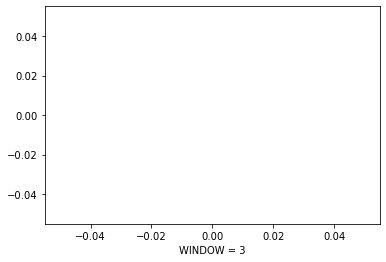

WINDOW_SIZE:  5
PREDICTION_HORIZON:  1


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21812.907978319185, tolerance: 170.94752965560002
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.05715216, 0.05603163, 0.05485522, 0.07296876, 0.07885745,
       0.06868311, 0.08282371, 0.07048906, 0.07232817, 0.06945694,
       0.0670893 , 0.05763959, 0.05838707, 0.06061714, 0.06103064,
       0.05889644, 0.08064652, 0.07343224, 0.05928764, 0.06353276,
       0.07678313, 0.07856135, 0.06784105, 0.08162975, 0.07668959,
       0.07548877, 0.061531  , 0.05270465, 0.06116579, 0.06107039,
       0.06213452, 0.06057634, 0.06295048, 0.05596963, 0.05186094,
       0.07240132, 0.07065954, 0.06402748, 0.05939534, 0.06157232,
       0.05245054, 0.05275703]), 'std_fit_time': array([0.00990054, 0.00415307, 0.00456149, 0.01720456, 0.014101  ,
       0.01130126, 0.01359315, 0.01501025, 0.01543953, 0.01329984,
       0.01233268, 0.00449698, 0.00430605, 0.00805495, 0.00457654,
       0.00416984, 0.02051805, 0.0148403 , 0.00484269, 0.0124354 ,
       0.01958374, 0.02016836, 0.01104305, 0.01298992, 0.0240975 ,
       0.01522183, 0.00727017, 0.00285936, 0.0076993 , 0.00712

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35103.44030270255, tolerance: 170.01948915
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.0598465 , 0.0554136 , 0.05631104, 0.07336437, 0.06644422,
       0.06149929, 0.06133263, 0.06250885, 0.05936422, 0.06988943,
       0.05707   , 0.05632451, 0.05763888, 0.05521292, 0.05743345,
       0.05917444, 0.059719  , 0.06003334, 0.05826244, 0.05912174,
       0.05656909, 0.06954002, 0.06441694, 0.06884461, 0.07200508,
       0.06907561, 0.05939845, 0.05808179, 0.07958196, 0.06264629,
       0.07958796, 0.07383272, 0.07261551, 0.07563444, 0.06554071,
       0.06668455, 0.06857402, 0.07208802, 0.06019358, 0.05951505,
       0.0550573 , 0.05258502]), 'std_fit_time': array([0.00821512, 0.00432743, 0.00630887, 0.01103164, 0.00617688,
       0.00900871, 0.00825617, 0.00693923, 0.00491664, 0.01079171,
       0.00448715, 0.0047179 , 0.00791244, 0.00334809, 0.00358624,
       0.00788295, 0.00567632, 0.00750028, 0.00845405, 0.00767381,
       0.00651934, 0.01522177, 0.00970383, 0.01383677, 0.01246901,
       0.01610654, 0.00893914, 0.00995291, 0.01512409, 0.00738

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82018.68103244415, tolerance: 169.79020541710003
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.05740097, 0.058533  , 0.05635184, 0.06014795, 0.05692528,
       0.06238634, 0.05814409, 0.05741096, 0.05819045, 0.05939888,
       0.05965567, 0.06178474, 0.06086559, 0.05824705, 0.06508947,
       0.06190802, 0.05780667, 0.05861389, 0.06315181, 0.05903904,
       0.05500518, 0.06154536, 0.06139808, 0.06705107, 0.06491003,
       0.0606094 , 0.06215502, 0.05747508, 0.06692983, 0.0618915 ,
       0.06652941, 0.06606544, 0.06287519, 0.05955987, 0.05645143,
       0.06951002, 0.06892401, 0.06743191, 0.06244029, 0.05939093,
       0.05974653, 0.05070046]), 'std_fit_time': array([0.00994088, 0.00784927, 0.00544405, 0.00922253, 0.00507386,
       0.00950278, 0.00745394, 0.00394754, 0.00923713, 0.00709454,
       0.00803486, 0.00598425, 0.00791882, 0.00470798, 0.0104985 ,
       0.00601443, 0.00262732, 0.00347691, 0.00883259, 0.0047669 ,
       0.00290889, 0.00920219, 0.00549429, 0.01761841, 0.00919562,
       0.00487221, 0.00498327, 0.00764184, 0.00918524, 0.00507

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65350.84098692474, tolerance: 165.1577645499
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.06665906, 0.07709806, 0.06166001, 0.0756114 , 0.06585983,
       0.07050444, 0.06760439, 0.07398383, 0.06744774, 0.05974758,
       0.06277463, 0.06596484, 0.06466366, 0.05943388, 0.06872032,
       0.07028534, 0.07343128, 0.06675596, 0.06902235, 0.06670506,
       0.06981134, 0.08278972, 0.07888755, 0.06741212, 0.06627561,
       0.06557916, 0.06754138, 0.06158946, 0.06889212, 0.06846008,
       0.08149303, 0.08598211, 0.09712688, 0.06274277, 0.05450068,
       0.077999  , 0.07488985, 0.07067978, 0.07501531, 0.06421319,
       0.05795907, 0.0521193 ]), 'std_fit_time': array([0.00987108, 0.01078916, 0.00591431, 0.01342786, 0.00909013,
       0.01479292, 0.01523582, 0.01251845, 0.009744  , 0.00474448,
       0.00558451, 0.00832607, 0.00786332, 0.0042722 , 0.00717361,
       0.01673562, 0.01669397, 0.00745516, 0.01380886, 0.01091758,
       0.01587337, 0.01389591, 0.0112798 , 0.01020882, 0.00890276,
       0.00938812, 0.00789148, 0.00589865, 0.01136492, 0.01032

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94068.90592492808, tolerance: 152.0951721939
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.06451472, 0.06497691, 0.06372291, 0.05841687, 0.067799  ,
       0.06895084, 0.06473116, 0.06458335, 0.07143792, 0.08192534,
       0.06324169, 0.06752312, 0.08410475, 0.07090786, 0.07733625,
       0.07618845, 0.09226396, 0.06954345, 0.06212142, 0.06376268,
       0.06216067, 0.06580114, 0.06165315, 0.06346103, 0.06015662,
       0.06408164, 0.06496364, 0.05666289, 0.06680939, 0.06287678,
       0.06573491, 0.066081  , 0.06478903, 0.06628655, 0.0612478 ,
       0.08150419, 0.1090351 , 0.08964676, 0.0978157 , 0.08148544,
       0.0863494 , 0.09532626]), 'std_fit_time': array([0.00824277, 0.01957068, 0.01541206, 0.00347208, 0.00587895,
       0.01073979, 0.00832473, 0.00901113, 0.0155999 , 0.01313347,
       0.00560184, 0.00982206, 0.01592844, 0.01219859, 0.01153855,
       0.01093256, 0.02053937, 0.01077895, 0.00507676, 0.00803154,
       0.00581897, 0.01122543, 0.00656662, 0.00693406, 0.0026077 ,
       0.00949595, 0.00724049, 0.00903074, 0.00671401, 0.00428

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103200.81154503064, tolerance: 146.2443175651
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.07583196, 0.06365387, 0.06502181, 0.06917592, 0.06791074,
       0.0656625 , 0.07949165, 0.08749308, 0.10763537, 0.0909299 ,
       0.07805627, 0.06906397, 0.06790402, 0.06569829, 0.06807901,
       0.07909865, 0.07256802, 0.07084865, 0.0867927 , 0.09899112,
       0.11567713, 0.10143303, 0.11831381, 0.08101549, 0.06872692,
       0.06511052, 0.06386507, 0.07338415, 0.06988707, 0.07982045,
       0.07239411, 0.10006552, 0.07891468, 0.06974675, 0.07556285,
       0.11974071, 0.07567735, 0.07759151, 0.08500201, 0.06818349,
       0.09243634, 0.07797805]), 'std_fit_time': array([0.02020745, 0.00548347, 0.00709922, 0.01264785, 0.00595494,
       0.0081788 , 0.01847644, 0.01620583, 0.01763212, 0.02304653,
       0.01458344, 0.00850619, 0.01075594, 0.01088957, 0.01107302,
       0.01929129, 0.00767716, 0.00576375, 0.01553525, 0.0159812 ,
       0.03308684, 0.02473847, 0.02596863, 0.01131445, 0.0124443 ,
       0.00874957, 0.00746408, 0.02267945, 0.00621846, 0.01763

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153114.074079117, tolerance: 174.72525794560005
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.0937749 , 0.08789822, 0.09275861, 0.10118699, 0.10216808,
       0.11346126, 0.07672198, 0.07261147, 0.06222963, 0.06225138,
       0.06419544, 0.06328731, 0.07192852, 0.08298291, 0.0714805 ,
       0.06854886, 0.07920686, 0.06875691, 0.07942263, 0.07237582,
       0.10300062, 0.07278162, 0.06939305, 0.06674574, 0.077693  ,
       0.07705124, 0.07811369, 0.07862868, 0.11366678, 0.09682008,
       0.09246007, 0.08473027, 0.11215206, 0.0958283 , 0.08744429,
       0.11752365, 0.11508123, 0.0854564 , 0.06995561, 0.09618587,
       0.08439112, 0.06559014]), 'std_fit_time': array([0.02900203, 0.01885014, 0.02275071, 0.01996814, 0.02459294,
       0.03084817, 0.01383012, 0.01064621, 0.00296707, 0.00317806,
       0.00837004, 0.00623884, 0.01448244, 0.01628103, 0.0100417 ,
       0.00902495, 0.01281304, 0.00702351, 0.01408339, 0.01175883,
       0.02202138, 0.01804545, 0.00902588, 0.00880241, 0.02412256,
       0.01603289, 0.01508254, 0.01714255, 0.02949862, 0.01937

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205319.38433165615, tolerance: 244.2638454275
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.09249899, 0.09969328, 0.10838598, 0.08910754, 0.07296878,
       0.07655222, 0.07165802, 0.08474458, 0.08702451, 0.09210605,
       0.10173457, 0.07180998, 0.11236987, 0.0920083 , 0.09150085,
       0.06790961, 0.06227613, 0.06183941, 0.06461362, 0.06268715,
       0.05927079, 0.0616816 , 0.06665253, 0.08840489, 0.06619102,
       0.10106699, 0.09050043, 0.08091699, 0.09778568, 0.06592892,
       0.0787974 , 0.07748444, 0.07760442, 0.10178002, 0.08651771,
       0.09780275, 0.07554262, 0.0739941 , 0.06752619, 0.06450106,
       0.05971235, 0.05160476]), 'std_fit_time': array([0.01874559, 0.01814293, 0.02312001, 0.02132021, 0.01349563,
       0.01664645, 0.01497056, 0.01436335, 0.01212878, 0.02213532,
       0.02081881, 0.01251125, 0.02947215, 0.0138827 , 0.02947713,
       0.00847665, 0.00439707, 0.00453862, 0.00748318, 0.00440174,
       0.00923557, 0.00451796, 0.00903444, 0.02403094, 0.00914044,
       0.01890893, 0.02477784, 0.01879285, 0.02860919, 0.00778

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268276.12784291577, tolerance: 381.9062573131
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.07453937, 0.07715394, 0.08259239, 0.07861943, 0.08037178,
       0.0814251 , 0.09394003, 0.0767367 , 0.10138398, 0.08148177,
       0.0809243 , 0.07676877, 0.08252048, 0.10834072, 0.09699065,
       0.08257562, 0.08289442, 0.0937947 , 0.0893911 , 0.09888658,
       0.10884166, 0.0940831 , 0.08267631, 0.10202542, 0.10470154,
       0.08805922, 0.09104626, 0.12835652, 0.17308322, 0.13940515,
       0.16578891, 0.13387978, 0.0970156 , 0.08931499, 0.07556295,
       0.07766333, 0.08291902, 0.07482826, 0.07082473, 0.08121525,
       0.07305668, 0.07653108]), 'std_fit_time': array([0.01434709, 0.01083462, 0.0121207 , 0.01093464, 0.01584932,
       0.01185674, 0.01423364, 0.00941765, 0.0263846 , 0.01097319,
       0.02065899, 0.01128622, 0.01208222, 0.02009651, 0.01480004,
       0.01382197, 0.01098428, 0.01958119, 0.01429395, 0.03014361,
       0.02927504, 0.02045907, 0.01446561, 0.01751589, 0.01788295,
       0.02358263, 0.02646599, 0.03965501, 0.03282372, 0.02640

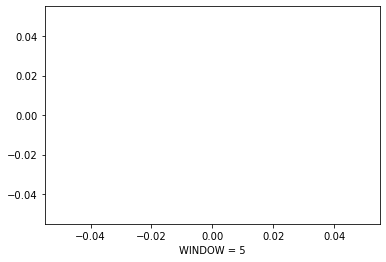

WINDOW_SIZE:  7
PREDICTION_HORIZON:  1


C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18157.74490746772, tolerance: 169.73479427639998
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.05603932, 0.05585929, 0.0600807 , 0.05952421, 0.05638994,
       0.06181329, 0.06947153, 0.07089139, 0.06068219, 0.06473641,
       0.06891108, 0.08445733, 0.09429154, 0.08601259, 0.07554776,
       0.07450792, 0.09208531, 0.06753042, 0.08182769, 0.07439953,
       0.06165366, 0.05989989, 0.06807263, 0.07078778, 0.06811529,
       0.07439604, 0.06570559, 0.08691951, 0.09416737, 0.07812909,
       0.07341928, 0.06225362, 0.0630139 , 0.06323313, 0.05079456,
       0.07795694, 0.08592254, 0.10064551, 0.07428432, 0.06968152,
       0.08267177, 0.06924427]), 'std_fit_time': array([0.00584988, 0.0036266 , 0.00660845, 0.00632148, 0.00265154,
       0.00979805, 0.01102458, 0.01601136, 0.0078132 , 0.00983282,
       0.01201405, 0.01652844, 0.01483463, 0.0140475 , 0.01370066,
       0.02741987, 0.02211613, 0.01223453, 0.01238521, 0.01352739,
       0.00769147, 0.00405054, 0.00975831, 0.01162197, 0.01293388,
       0.01530562, 0.01131416, 0.02234373, 0.01994619, 0.01838

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25811.120809892498, tolerance: 169.93725074039997
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.06531173, 0.06210323, 0.0661056 , 0.06305096, 0.05862331,
       0.06221732, 0.0628234 , 0.06169306, 0.06399807, 0.08069427,
       0.09631511, 0.08207074, 0.09027734, 0.08314714, 0.06419065,
       0.07452548, 0.07390839, 0.07776113, 0.07800357, 0.08440068,
       0.10515308, 0.12179534, 0.10501173, 0.0917698 , 0.09187993,
       0.10865721, 0.09549092, 0.06447256, 0.07628708, 0.06544945,
       0.07901368, 0.07213453, 0.07617272, 0.06170789, 0.05416491,
       0.0734001 , 0.06902677, 0.0766391 , 0.06396101, 0.06275923,
       0.06613016, 0.07513524]), 'std_fit_time': array([0.01000288, 0.0081298 , 0.01085228, 0.00775792, 0.0040781 ,
       0.00559411, 0.00980306, 0.00589859, 0.00795639, 0.02171011,
       0.02386102, 0.02122053, 0.02343947, 0.02073119, 0.00652237,
       0.01473336, 0.01223714, 0.01702074, 0.00897842, 0.01244041,
       0.02600174, 0.01522726, 0.01929335, 0.02101601, 0.01082484,
       0.01528823, 0.02598863, 0.01215921, 0.01150209, 0.00522

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76423.64909325268, tolerance: 165.1577645499
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.11956177, 0.11766777, 0.0949844 , 0.09084706, 0.09295758,
       0.09184685, 0.08699679, 0.1292666 , 0.1241037 , 0.1060928 ,
       0.07127294, 0.0717537 , 0.07523026, 0.09926976, 0.07921011,
       0.12420693, 0.10192621, 0.0803864 , 0.08203173, 0.07341812,
       0.0897395 , 0.09388247, 0.11872241, 0.10133683, 0.07642583,
       0.08497008, 0.07110899, 0.06562779, 0.07310466, 0.07238693,
       0.08000817, 0.07613516, 0.07438741, 0.06316959, 0.05835106,
       0.07923027, 0.09586992, 0.09111662, 0.09776205, 0.10027624,
       0.09000644, 0.05658138]), 'std_fit_time': array([0.02182856, 0.03398108, 0.02239136, 0.01837384, 0.01876534,
       0.01369852, 0.01603031, 0.03092778, 0.01806981, 0.02806299,
       0.01113514, 0.01231209, 0.01510407, 0.01767733, 0.01318384,
       0.0305657 , 0.02089732, 0.01324872, 0.01758004, 0.01321642,
       0.0201417 , 0.01648384, 0.01377415, 0.01622945, 0.02100801,
       0.01464253, 0.00941107, 0.01016424, 0.0105917 , 0.00930

C:\Users\wang.yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68541.08170388029, tolerance: 156.61967681310003
  model = cd_fast.enet_coordinate_descent(


{'mean_fit_time': array([0.0609889 , 0.06118951, 0.06510499, 0.06003059, 0.06616356,
       0.06309903, 0.06803683, 0.07597001, 0.08556216, 0.09807521,
       0.09711837, 0.06847312, 0.06719147, 0.06433804, 0.06798381,
       0.06160545, 0.06820129, 0.06243695, 0.07030989, 0.06244612,
       0.06774349, 0.06716154, 0.06365453, 0.07387328, 0.08094855,
       0.06560385, 0.07202214, 0.08667001, 0.11593173, 0.11411169,
       0.09972491, 0.09695822, 0.10206627, 0.08775531, 0.06994478,
       0.11882918, 0.13150588, 0.11048341, 0.12967308, 0.08732393,
       0.06981782, 0.06804337]), 'std_fit_time': array([0.0045972 , 0.00543638, 0.01031177, 0.00371546, 0.01018925,
       0.00498572, 0.0111923 , 0.01658609, 0.01604871, 0.01357938,
       0.01390624, 0.01154346, 0.01049473, 0.0078068 , 0.01108411,
       0.0044469 , 0.01037233, 0.00486892, 0.01195892, 0.00446639,
       0.01114347, 0.01002679, 0.00876797, 0.01533184, 0.01680333,
       0.0112248 , 0.01474433, 0.02214122, 0.01837541, 0.02897

In [ ]:
# Betti derivatives
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

def exclude_days(train, test):

    row, column = train.shape
    train_days = np.asarray(train[:, -1]).reshape(-1, 1)
    x_train = train[:, 0:column - 1]
    test_days = np.asarray(test[:, -1]).reshape(-1, 1)
    x_test = test[:, 0:column - 1]

    return x_train, x_test, train_days, test_days

def merge_data(occurrence_data, daily_occurrence_normalized_matrix, aggregation_of_previous_days_allowed):
    if(aggregation_of_previous_days_allowed):
        if(occurrence_data.size==0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.add(occurrence_data, daily_occurrence_normalized_matrix)
    else:
        if(occurrence_data.size == 0):
            occurrence_data = daily_occurrence_normalized_matrix
        else:
            occurrence_data = np.concatenate((occurrence_data, daily_occurrence_normalized_matrix), axis=1)
   #print("merge_data shape: {} occurrence_data: {} ".format(occurrence_data.shape, occurrence_data))
    return occurrence_data
    
def get_normalized_matrix_from_file(day, year, totaltx):
    daily_occurrence_matrix_path_name = DAILY_OCCURRENCE_FILE_PATH + "occ" + str(year) + '{:03}'.format(day) + '.csv'
    daily_occurence_matrix = pd.read_csv(daily_occurrence_matrix_path_name, sep=",", header=None).values
   #print("daily_occurence_matrix.size: ", daily_occurence_matrix.size, daily_occurence_matrix.shape)
   #print("np.asarray(daily_occurence_matrix): ",np.asarray(daily_occurence_matrix))
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size): ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size), np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).shape, np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size).size)
   #print("totaltx: ",totaltx)
   #print("np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx: ",np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx)
    return np.asarray(daily_occurence_matrix).reshape(1, daily_occurence_matrix.size)/totaltx

def get_daily_occurrence_matrices(priced_bitcoin, current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
   #print("priced_bitcoin: ", priced_bitcoin, priced_bitcoin.shape)
   #print("current_row: ", current_row, current_row.shape)
    previous_price_data = np.array([], dtype=np.float32)
    occurrence_data = np.array([], dtype=np.float32)
    for index, row in priced_bitcoin.iterrows():
        if not ((row.values == current_row.values).all()):
            previous_price_data = np.append(previous_price_data, row['price'])
            previous_price_data = np.append(previous_price_data, row['totaltx'])
           #print("previous_price_data: ", previous_price_data,row['day'], row['year'], row['totaltx'])

    
   #print("occurrence_data: ", occurrence_data)
    if(is_price_of_previous_days_allowed):
       #print("previous_price_data: ", np.asarray(previous_price_data).reshape(1, -1), np.asarray(previous_price_data).reshape(1, -1).shape)
        occurrence_data = np.asarray(previous_price_data).reshape(1, -1)
        
    betti0_50 = read_betti(betti0_input_path, current_row['day'])
    occurrence_input = np.concatenate((occurrence_data, np.asarray(betti0_50).reshape(1,-1)), axis=1)
    betti0_50_diff1 = betti0_50.diff(1).dropna() 
    occurrence_input = np.concatenate((occurrence_input, np.asarray(betti0_50_diff1).reshape(1,-1)), axis=1)

    betti1_50 = read_betti(betti1_input_path, current_row['day'])
    occurrence_input = np.concatenate((occurrence_input, np.asarray(betti1_50).reshape(1,-1)), axis=1)
    betti1_50_diff1 = betti1_50.diff(1).dropna()
    #print("betti1_50_diff1: ", betti1_50_diff1, betti1_50_diff1.shape)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(betti1_50_diff1).reshape(1,-1)), axis=1)

    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['price']).reshape(1,1)), axis=1)
   #print("current_row['day']: ", current_row['day'], current_row['day'].shape)
   #print(" price occurrence_input: ", np.asarray(current_row['price']).reshape(1,1), (np.asarray(current_row['price']).reshape(1,1)).shape)
   #print("concatenate with price occurrence_input: ", occurrence_input, occurrence_input.shape)
    occurrence_input = np.concatenate((occurrence_input, np.asarray(current_row['day']).reshape(1,1)), axis=1)
   #print(" price occurrence_input: ", np.asarray(current_row['day']).reshape(1,1), (np.asarray(current_row['day']).reshape(1,1)).shape)

    #print("concatenate with day occurrence_input: ", occurrence_input, occurrence_input.shape)

    return occurrence_input


def GridSearch(elastic, params, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    cscv = GridSearchCV(elastic, params, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    cscv.fit(X, y)

    print(cscv.cv_results_)
    print(cscv.best_params_)

    
def run_print_model(train_input, train_target, test_input, test_target, train_days, test_days):
#    train_X, train_y = get_data()

    param = {
        'alpha': 0.0001,
        'l1_ratio': 0.001,
        }
    elastic = linear_model.ElasticNet(**param)

    adj_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                 'l1_ratio': [0.001, 0.005 ,0.01, 0.05, 0.1, 0.5, 1]}

    GridSearch(elastic , adj_params , train_input, train_target)
    
    
    #elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=1, max_iter=1000000)
    #elastic.fit(train_input,train_target.ravel())  
    #predicted = elastic.predict(test_input) 
    #rmse = np.sqrt(metrics.mean_squared_error(test_target, predicted))
    #print ("RMSE:", np.sqrt(metrics.mean_squared_error(test_target, predicted))) 
    return #rmse

def preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    priced_bitcoin = pd.read_csv(PRICED_BITCOIN_FILE_PATH, sep=",")
    if(ALL_YEAR_INPUT_ALLOWED):
        pass
    else:
        priced_bitcoin = priced_bitcoin[priced_bitcoin['year']==YEAR].reset_index(drop=True)
    
    # get normalized occurence matrix in a flat format and merge with totaltx
    daily_occurrence_input = np.array([],dtype=np.float32)
    temp = np.array([], dtype=np.float32)
    for current_index, current_row in priced_bitcoin.iterrows():
        if(current_index<(window_size+prediction_horizon-1)):
            pass
        else:
            start_index = current_index - (window_size + prediction_horizon) + 1
            end_index = current_index - prediction_horizon
            temp = get_daily_occurrence_matrices(priced_bitcoin[start_index:end_index+1], current_row, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)    
            #print("1st temp: ", temp, temp.shape)
        if(daily_occurrence_input.size == 0):
            daily_occurrence_input = temp
        else:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
            #print("temp: ", temp, temp.shape)
            daily_occurrence_input = np.concatenate((daily_occurrence_input, temp), axis=0)
            #print("return daily_occurrence_input:", daily_occurrence_input, daily_occurrence_input.shape)
            
        #if current_index == 108:
            #print("daily_occurrence_input: ", daily_occurrence_input, daily_occurrence_input.shape)
    return daily_occurrence_input
        
betti0_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_0(100).csv"
betti1_input_path = "C:/Users/wang.yuhao/Documents/ChainNet/data/original_data/betti_1(100).csv"

def read_betti(file_path, day):
    day = day - 1
    betti = pd.read_csv(file_path, index_col=0)
    try:
        betti_50 = betti.iloc[day, 0:50]
    except:
        print("day:",  day)
            
    return betti_50
    
    
def initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed):
    data = preprocess_data(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
    #train, test = train_test_split(data, test_size=TEST_SPLIT)
    #data = pd.DataFrame(data)
    train = data[0:100, :]
    test = data[101, :].reshape(1, -1)
    #print(" train, test shape",train.shape, test.shape)
    #print(" train, test",train, test)
    
    x_train, x_test, train_days, test_days = exclude_days(train, test)
    #print("x_train:", x_train)
    row, column = x_train.shape
    train_target = np.asarray(x_train[:, -1]).reshape(-1)
    train_input = x_train[:, 0:column - 1]
    #x_test = x_test.reshape(-1,1)
    test_target = x_test[: , -1]
    test_input = x_test[ : , 0:column - 1]
    return train_input, train_target, test_input, test_target, train_days, test_days

parameter_dict = {#0: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':True})}
                  1: dict({'is_price_of_previous_days_allowed':True, 'aggregation_of_previous_days_allowed':False})}

for step in parameter_dict:
    gc.collect()
    evalParameter = parameter_dict.get(step)
    is_price_of_previous_days_allowed = evalParameter.get('is_price_of_previous_days_allowed')
    aggregation_of_previous_days_allowed = evalParameter.get('aggregation_of_previous_days_allowed')
    print("IS_PRICE_OF_PREVIOUS_DAYS_ALLOWED: ", is_price_of_previous_days_allowed)
    print("AGGREGATION_OF_PREVIOUS_DAYS_ALLOWED: ", aggregation_of_previous_days_allowed)
    window_size_array = [3, 5, 7]
    horizon_size_array = [1, 2, 5, 7, 10, 15, 20, 25, 30]
    for window_size in window_size_array:
        print('WINDOW_SIZE: ', window_size)
        rmse_array = []
        for prediction_horizon in horizon_size_array:
            print("PREDICTION_HORIZON: ", prediction_horizon)
            train_input, train_target, test_input, test_target, train_days, test_days = initialize_setting(window_size, prediction_horizon, is_price_of_previous_days_allowed, aggregation_of_previous_days_allowed)
            #print("train_input, train_target: ",train_input, train_target, train_input.shape, train_target.shape)
            #print("test_input, test_target",test_input, test_target, test_input.shape, test_target.shape)
            #print("train_days, test_days: ",train_days, test_days)
            rmse = run_print_model(train_input, train_target, test_input, test_target, train_days, test_days)
            rmse_array.append(rmse)
            
        print("rmse_array:", rmse_array)    
        plt.plot(horizon_size_array, rmse_array)
        plt.xlabel('WINDOW = {}'.format(window_size))
        plt.show()
        
        


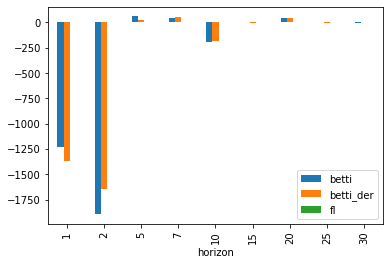

In [7]:
# Gain
enet_base_data={
        'horizon':[1, 2, 5, 7, 10, 15, 20, 25, 30],
        'window_3': [7.119026980618628, 3.8831696752636162, 73.62452429394898, 87.43821701810703, 84.57453069938856, 157.06225866094815, 318.60841854362, 456.5736688874788, 431.08799412786016], 
      'window_5': [3.53112934829187, 4.143659561293134, 60.73407068885035, 47.879425228903074, 71.07919476491134, 156.1006941639173, 206.14792095133157, 342.3700050216712, 113.12423972086435],
      'window_7': [38.535718049324714, 65.09698273335835, 45.6730621130107, 31.261431085806862, 93.09825316281831, 237.47204427559336, 231.5629240231176, 253.85028914970644, 250.97244314760655]}
enet_base_rmse = pd.DataFrame(enet_base_data, columns=['horizon','window_3', 'window_5', 'window_7'])
enet_betti_data={
    'horizon':[1, 2, 5, 7, 10, 15, 20, 25, 30],
    'window_3': [94.44651468296365, 77.45593937150716, 31.45903833039847, 51.68012298865824, 252.23279977022526, 154.97450226665114, 181.80426820582852, 442.9474106361338, 443.591676529144],
               'window_5': [32.29900912109156, 100.78448215403478, 54.95353985485008, 21.675458477407346, 127.44553061819056, 27.850637870891205, 242.41469094509284, 423.7420880384457, 259.91658297291565],
               'window_7': [81.85638414098867, 28.31527993795271, 36.35666117356345, 101.61893893864726, 316.33408300659835, 412.0398448929236, 33.519179916793746, 392.02152487711146, 24.491716975045847]}
enet_betti_rmse =pd.DataFrame(enet_betti_data, columns=['horizon','window_3', 'window_5', 'window_7'])

enet_betti_der_data={
    'horizon':[1, 2, 5, 7, 10, 15, 20, 25, 30],
     'window_3':[104.69685401254787, 67.66624862909885, 58.71396007680869, 43.80504204547469, 237.60515445038413, 175.76717354198604, 168.37431379347163, 475.61876085640847, 437.4845419550984],
                                      'window_5': [46.19492078583221, 101.64236853785496, 54.7306225918021, 18.202902328093387, 104.18922496239293, 38.28693324549067, 255.5003902954477, 400.7636370922269, 287.1233850758565],
                                        'window_7':[71.61586067230064, 71.22947155664974, 33.30632259186905, 106.81303699695945, 290.3782248885502, 431.4725433885005, 38.71778104277132, 385.1626388276477, 0.7223056433927013]}

enet_betti_der_rmse = pd.DataFrame(enet_betti_der_data, columns=['horizon','window_3', 'window_5', 'window_7'])

enet_fl_data = {
    'horizon':[1, 2, 5, 7, 10, 15, 20, 25, 30],
     'window_3': [7.126080531412299, 3.8735249435276273, 73.5886018426163, 87.37314038962586, 84.3716398098561, 156.87681947347642, 318.41590713351366, 456.3270399207354, 430.7900736849581],
                           'window_5':[3.5289547511151795, 4.156996115824313, 60.87062974890023, 48.05989733017486, 71.50605697950164, 156.53330257272273, 206.57661177016098, 342.56121916455504, 113.17925435520942],
                           'window_7':[38.539838304400064, 65.11731244441535, 45.80866639400824, 31.535234320408563, 93.7367731383506, 237.94002734542642, 231.78470303543736, 253.93053940149457, 251.0185828606982]}
enet_fl_rmse = pd.DataFrame(enet_fl_data, columns=['horizon','window_3', 'window_5', 'window_7'])

enet_base_rmse.set_index('horizon', drop=True, inplace=True)
enet_betti_rmse.set_index('horizon', drop=True, inplace=True)
enet_betti_der_rmse.set_index('horizon', drop=True, inplace=True)
enet_fl_rmse.set_index('horizon', drop=True, inplace=True)

enet_betti_gain = 100 * (1 - enet_betti_rmse/enet_base_rmse)
enet_betti_der_gain = 100 * (1 - enet_betti_der_rmse/enet_base_rmse)
enet_fl_gain = 100 * (1 - enet_fl_rmse/enet_base_rmse)

enet_w3_gain = pd.concat([enet_betti_gain['window_3'], enet_betti_der_gain['window_3'],  enet_fl_gain['window_3']], axis=1)
enet_w3_gain.columns = ['betti', 'betti_der', 'fl']
enet_w3_gain = enet_w3_gain.plot(kind='bar')
enet_w3_gain.figure.savefig('enet_w3_perf.jpg')

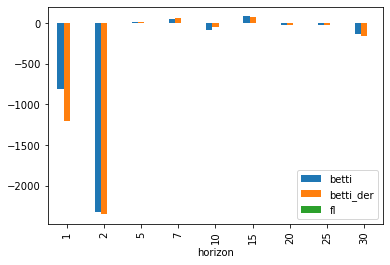

In [8]:
enet_w5_gain = pd.concat([enet_betti_gain['window_5'], enet_betti_der_gain['window_5'],  enet_fl_gain['window_5']], axis=1)
enet_w5_gain.columns = ['betti', 'betti_der', 'fl']
enet_w5_gain = enet_w5_gain.plot(kind='bar')
enet_w5_gain.figure.savefig('enet_w5_perf.jpg')

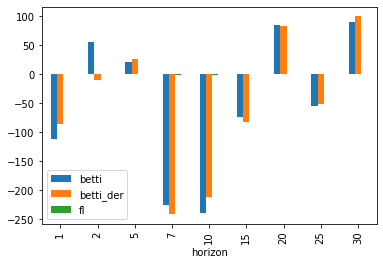

In [9]:
enet_w7_gain = pd.concat([enet_betti_gain['window_7'], enet_betti_der_gain['window_7'],  enet_fl_gain['window_7']], axis=1)
enet_w7_gain.columns = ['betti', 'betti_der', 'fl']
enet_w7_gain = enet_w7_gain.plot(kind='bar')
enet_w7_gain.figure.savefig('enet_w7_perf.jpg')